In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [3]:
x_train_words = ['good','bad','amazing','so good','bull shit',
                 'awesome', 'how dare', 'very much', 'nice','god dame it',
                 'very very very happy', 'what the fuck']
y_train = np.array([1,0,1,1,0,
                    1,0,1,1,0,
                    1,0],dtype = np.int32)

In [4]:
index =1
print("word : {}\nlabel : {}".format(x_train_words[index],y_train[index]))

index =0
print("word : {}\nlabel : {}".format(x_train_words[index],y_train[index]))


word : bad
label : 0
word : good
label : 1


### 텍스트 데이터 처리르 ㄹ위한 Tokenizer 사용

In [6]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [9]:
tokenizer = Tokenizer(char_level = True)
tokenizer.fit_on_texts(x_train_words)

In [10]:
num_chars = len(tokenizer.word_index) + 1
print(f"number of characters : {num_chars}")

number of characters : 25


In [11]:
tokenizer.word_index

{' ': 1,
 'a': 4,
 'b': 18,
 'c': 17,
 'd': 5,
 'e': 2,
 'f': 23,
 'g': 9,
 'h': 6,
 'i': 11,
 'k': 24,
 'l': 20,
 'm': 10,
 'n': 19,
 'o': 3,
 'p': 21,
 'r': 7,
 's': 14,
 't': 12,
 'u': 15,
 'v': 13,
 'w': 16,
 'y': 8,
 'z': 22}

In [13]:
x_train_tokens = tokenizer.texts_to_sequences(x_train_words)

index = 2
print(f"text: {x_train_words[index]}\ntoken:{x_train_tokens[index]}")

text: amazing
token:[4, 10, 4, 22, 11, 19, 9]


In [15]:
x_train_seq_length = np.array([len(tokens) for tokens in x_train_tokens], dtype = np.int32)
num_seq_length = x_train_seq_length
num_seq_length

array([ 4,  3,  7,  7,  9,  7,  8,  9,  4, 11, 20, 13], dtype=int32)

### 가장 긴 단어 길이에 맞게 Padding

1. 앞으로 Padding
1. 뒤로 Padding

In [16]:
max_seq_length = np.max(num_seq_length)
max_seq_length

20

In [19]:
pad = 'pre' # 앞으로 padding

x_train_pad = pad_sequences(sequences = x_train_tokens, maxlen = max_seq_length,
                           padding = pad, truncating = pad)

x_train_pad[:3]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         9,  3,  3,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 18,  4,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4, 10,  4,
        22, 11, 19,  9]], dtype=int32)

In [23]:
index = 7

print(f"text : {x_train_words[index]}\n\ntoken: {x_train_tokens[index]}\n\nPad  : {x_train_pad[index]}")

text : very much

token: [13, 2, 7, 8, 1, 10, 15, 17, 6]

Pad  : [ 0  0  0  0  0  0  0  0  0  0  0 13  2  7  8  1 10 15 17  6]


### Word To Index

In [25]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))
inverse_map

{1: ' ',
 2: 'e',
 3: 'o',
 4: 'a',
 5: 'd',
 6: 'h',
 7: 'r',
 8: 'y',
 9: 'g',
 10: 'm',
 11: 'i',
 12: 't',
 13: 'v',
 14: 's',
 15: 'u',
 16: 'w',
 17: 'c',
 18: 'b',
 19: 'n',
 20: 'l',
 21: 'p',
 22: 'z',
 23: 'f',
 24: 'k'}

### Index to Word

In [26]:
def tokens_to_string(tokens):
  words = [inverse_map[token] for token in tokens if token!=0]

  text = "".join(words)
  return text

In [28]:
index = 10
print(f"Original Text : {x_train_words[index]}\n")
print(f"Tokens        : {x_train_tokens[index]}\n")
print(f"Tokens to Txt : {tokens_to_string(x_train_tokens[index])}")

Original Text : very very very happy

Tokens        : [13, 2, 7, 8, 1, 13, 2, 7, 8, 1, 13, 2, 7, 8, 1, 6, 4, 21, 21, 8]

Tokens to Txt : very very very happy


### Dataset to train

In [29]:
batch_size = 4
max_epochs = 50
num_units = 16
num_classes = 2  # True Or False
initializer_sclae = 0.1
learning_rate = 1e-3  # 0.001

In [31]:
#tf.data로 data pipline 생성

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_pad,x_train_seq_length, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 100)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(batch_size = batch_size)
print(train_dataset)

<BatchDataset shapes: ((None, 20), (None,), (None,)), types: (tf.int32, tf.int32, tf.int32)>


### Model 

In [33]:
model = keras.Sequential([
                          keras.layers.Embedding(num_chars,num_chars, embeddings_initializer='identity',trainable = False),
                          keras.layers.LSTM(units = num_units),
                          keras.layers .Dense(units = num_classes, activation = 'sigmoid')

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 25)          625       
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2688      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 3,347
Trainable params: 2,722
Non-trainable params: 625
_________________________________________________________________


In [34]:
optimize = keras.optimizers.Adam(learning_rate = learning_rate)
loss_obj = keras.losses.BinaryCrossentropy(from_logits = False)
mean_loss = keras.metrics.Mean("loss")
loss_history = []

### tf.GradientTape을 이용한 학습진행

In [49]:
import time
from IPython.display import clear_output
total_steps = int(len(x_train_words)/ batch_size * max_epochs)

for (step, (seq_pad, seq_length, labels)) in enumerate(train_dataset.take(total_steps)):
  start_time = time.time()
  with tf.GradientTape() as tape:
    logits = model(seq_pad)
    loss_value = loss_obj(tf.one_hot(labels, depth = num_classes),logits)

  mean_loss(loss_value)
  loss_history.append((mean_loss.result().numpy()))
  grads = tape.gradient(loss_value,model.variables)
  optimize.apply_gradients(zip(grads,model.variables))

  if step % 3 == 0:
    clear_output(wait =True)
    duration  = time.time() - start_time
    examples_per_sec = batch_size / float(duration)
    epochs = batch_size * step / float(len(x_train_words))

    print("epochs : {:.2f}, step : {}, loss : {:g},({:.2f} examples/sec: {:.3f} sec/batch".format(epochs, step, loss_value, examples_per_sec, duration))

epochs : 49.00, step : 147, loss : 0.137133,(90.45 examples/sec: 0.044 sec/batch


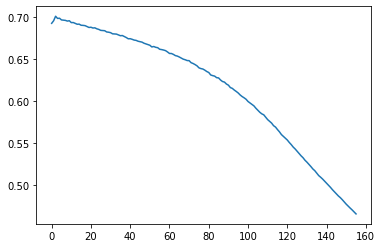

In [60]:
import matplotlib.pyplot as plt
loss_history = np.array(loss_history)
plt.plot(loss_history, label='train')
plt.show()

In [52]:
train_dataset_eval  = tf.data.Dataset.from_tensor_slices((x_train_pad, x_train_seq_length,y_train))
train_dataset_eval = train_dataset_eval.batch(batch_size = len(x_train_pad))

In [53]:
loss_object = keras.losses.CategoricalCrossentropy()
acc_object = keras.metrics.CategoricalAccuracy()
val_acc_object = keras.metrics.CategoricalAccuracy()

In [54]:
val_mean_loss = keras.metrics.Mean("loss")
val_mean_accuracy = keras.metrics.Mean("accuracy")

In [56]:
for (step, (seq_pad, seq_length, labels)) in enumerate(train_dataset.take(1)):
    predictions = model(seq_pad, training=False)
    val_loss_value = loss_object(tf.one_hot(labels, depth=num_classes), predictions)
    val_acc_value = val_acc_object(tf.one_hot(labels, depth=num_classes), predictions)

    val_mean_loss(val_loss_value)
    val_mean_accuracy(val_acc_value)

    print("valid loss : {: .4g}, valid accuracy : {: .4g}%".format(val_mean_loss.result(),
                                                                   val_mean_accuracy.result() * 100))

valid loss :  0.01018, valid accuracy :  100%


In [57]:
for (step, (seq_pad, seq_length, labels)) in enumerate(train_dataset.take(1)):
  logits = model(seq_pad)
  predictions = tf.cast(tf.argmax(logits, 1), tf.int32)

predictions

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 0, 1, 1], dtype=int32)>

In [59]:
for x, y in zip(seq_pad, predictions):
  if y.numpy() == 1:
    print(f'"{tokens_to_string(x.numpy())}"  is  positive\n')
  else:
    print(f'"{tokens_to_string(x.numpy())}" is Negative\n')

"nice"  is  positive

"how dare" is Negative

"good"  is  positive

"amazing"  is  positive

